In [31]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
from analytics_tools3 import freq_discrete
%matplotlib inline

In [2]:
df = pd.read_csv('BPD_Arrests.csv.gz')

In [4]:
df.head()

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1
0,16160529.0,54.0,M,B,11/12/2016,22:35,3500 PELHAM AVE,4ECOMMON ASSAULT,3500 PELHAM AVE,1 1415,COMMON ASSAULT,Northeastern,432.0,Belair-Edison,"(39.3208685519, -76.5652449141)"
1,16160490.0,22.0,M,B,11/12/2016,21:49,300 S LOUDON AVE,Unknown Offense,300 S LOUDON AVE,4 3550,POSSESSION,Southwestern,833.0,Irvington,"(39.2811486601, -76.6821278085)"
2,16160487.0,31.0,M,B,11/12/2016,21:40,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN
3,16160485.0,31.0,M,B,11/12/2016,20:30,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN
4,16160481.0,33.0,M,B,11/12/2016,19:45,NaN,Unknown Offense,NaN,2 0480,MOTOR VEH/UNLAWFUL TAKING,NaN,NaN,NaN,NaN


In [5]:
df.shape

(130713, 15)

In [15]:
df['ArrestDate'] = pd.to_datetime(df['ArrestDate']).dt.date

In [16]:
df.ArrestDate.max()

datetime.date(2016, 11, 12)

In [21]:
freq_discrete(df[~df.District.isnull()],'District',True)

Frequency distribution table for variable: District


               Freq       Pct  Accum Freq  Accum Pct
Southern      11084  0.141016       11084   0.141016
Eastern       10449  0.132937       21533   0.273953
Western       10202  0.129795       31735   0.403748
Southeastern   9854  0.125367       41589   0.529115
Northeastern   8967  0.114083       50556   0.643198
Central        8825  0.112276       59381   0.755474
Southwestern   7095  0.090266       66476   0.845740
Northwestern   6998  0.089032       73474   0.934772
Northern       5127  0.065228       78601   1.000000




In [62]:
aux = df[['ArrestDate','District']].copy()
aux['mes'] = df.ArrestDate.map(lambda x:x.year*100)
aux.head()
aux['n'] = 1
aux['nmiss'] = (aux.District.isnull()).astype(int)
aux = aux[['mes','n','nmiss']].groupby('mes').sum()

In [63]:
aux['pct_miss'] = aux['nmiss']/aux['n']

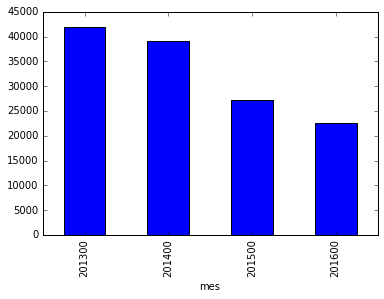

In [64]:
aux['n'].plot(kind='bar')

In [65]:
aux.drop(['n','nmiss'],axis=1,inplace=True)

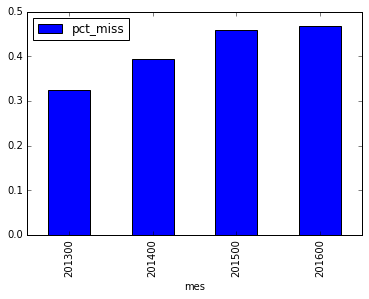

In [66]:
aux.plot(kind='bar')

In [54]:
freq_discrete(df,'IncidentOffense',True)

Frequency distribution table for variable: IncidentOffense


                               Freq       Pct  Accum Freq  Accum Pct
Unknown Offense               82046  0.627680       82046   0.627680
87-Narcotics                  12294  0.094053       94340   0.721734
4E-Common Assault              6304  0.048228      100644   0.769962
UNKNOWN OFFENSE                3209  0.024550      103853   0.794512
87O-Narcotics (Outside)        2602  0.019906      106455   0.814418
6C-Larceny- Shoplifting        2222  0.016999      108677   0.831417
79-Other                       1959  0.014987      110636   0.846404
24-Towed Vehicle               1581  0.012095      112217   0.858499
97-Search & Seizure            1544  0.011812      113761   0.870311
4C-Agg. Asslt.- Oth.           1466  0.011215      115227   0.881527
4B-Agg. Asslt.- Cut            1302  0.009961      116529   0.891487
5A-Burg. Res. (Force)           852  0.006518      117381   0.898006
55-Disorderly Person            817  0.006

In [55]:
aux.head()

,pct_miss
mes,
201301,0.311782
201302,0.302162
201303,0.298446
201304,0.315115
201305,0.309863
